# Documentation

This file contains work on cleaning raw data, as well as shallow exploration with data visualization on the behaviors of hearing measures.

Demonstrates plausibility of dimensional reduction.

# Work

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load in data...**

Note: I took a look at the data beforehand, and decided to drop unnecessary empty columns and rows.

In [ ]:
# data: original informative data
data = pd.read_csv('/content/drive/MyDrive/UW/sphscAudiogram/audiogram.csv').drop(columns = ['Unnamed: 37']).drop([267, 268])

**Check what columns there are.**

In [ ]:
# data: original informative data
data.columns

Index(['ID', 'AGE', 'GENDER', 'R250', 'R500', 'R1000', 'R2000', 'R3000',
       'R4000', 'R6000', 'R8000', 'RPTA3', 'RPTA4', 'L250', 'L500', 'L1000',
       'L2000', 'L3000', 'L4000', 'L6000', 'L8000', 'LPTA3', 'LPTA4',
       'PTA3mean', 'PTA4mean', 'ID_NHT', 'VOLUME SETTING', 'EAR TESTED FIRST',
       'ClientID', 'TestID', 'Begin', 'TotDur1', 'FS1', 'LT1', 'LD1', 'RT1',
       'RD1'],
      dtype='object')

*To be added: specification of the columns*

We are not interested in these columns, so let's drop them.

In [ ]:
# interest: data of interest
interest = data.drop(columns = ['ID', 'ID_NHT', 'EAR TESTED FIRST',
       'ClientID', 'TestID', 'Begin', 'FS1'])

**Look at each column's data type.**

In [ ]:
# interest: data of interest
interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             267 non-null    float64
 1   GENDER          267 non-null    object 
 2   R250            266 non-null    float64
 3   R500            266 non-null    float64
 4   R1000           266 non-null    float64
 5   R2000           266 non-null    float64
 6   R3000           266 non-null    float64
 7   R4000           266 non-null    float64
 8   R6000           266 non-null    float64
 9   R8000           266 non-null    object 
 10  RPTA3           266 non-null    float64
 11  RPTA4           266 non-null    float64
 12  L250            266 non-null    float64
 13  L500            266 non-null    float64
 14  L1000           266 non-null    float64
 15  L2000           266 non-null    float64
 16  L3000           266 non-null    float64
 17  L4000           266 non-null    flo

**Display rows that have NA in them.**

In [ ]:
# interest: data of interest
interest[interest.isna().any(axis=1)]

,AGE,GENDER,R250,R500,R1000,R2000,R3000,R4000,R6000,R8000,...,LPTA3,LPTA4,PTA3mean,PTA4mean,VOLUME SETTING,TotDur1,LT1,LD1,RT1,RD1
134,60.6,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,76.0,Female,15.0,25.0,25.0,30.0,35.0,35.0,50.0,65,...,33.33,37.50,30.00,33.13,75.0,NaN,NaN,NaN,NaN,NaN
187,71.0,Female,10.0,5.0,5.0,10.0,15.0,30.0,55.0,70,...,10.00,15.00,8.33,13.75,70.0,NaN,NaN,NaN,NaN,NaN
189,29.0,Male,0.0,0.0,-5.0,0.0,-5.0,-10.0,0.0,5,...,0.00,-2.50,-0.83,-3.13,70.0,NaN,NaN,NaN,NaN,NaN
204,75.0,Male,15.0,15.0,25.0,35.0,60.0,60.0,75.0,50,...,31.67,36.25,28.33,35.00,70.0,NaN,NaN,NaN,NaN,NaN
205,77.0,Female,0.0,15.0,15.0,5.0,15.0,5.0,30.0,35,...,15.00,17.50,13.33,13.75,65.0,NaN,NaN,NaN,NaN,NaN
209,57.0,Female,10.0,10.0,20.0,20.0,20.0,15.0,25.0,30,...,10.00,8.75,13.33,12.50,75.0,NaN,NaN,NaN,NaN,NaN
235,53.1,Female,35.0,60.0,65.0,75.0,65.0,75.0,85.0,90,...,61.67,68.75,64.17,68.75,81.0,NaN,NaN,NaN,NaN,NaN
258,59.9,Male,65.0,70.0,80.0,80.0,95.0,100.0,85.0,90,...,93.33,97.50,85.00,90.00,NaN,NaN,NaN,NaN,NaN,NaN


We can see that there is one row with complete blank data, and some several rows with NA in just particular columns. So let's drop row 134 and those columns for now.

In [ ]:
# clean: cleaned interested data
clean = interest.drop([134]).drop(columns = ['TotDur1', 'LT1', 'LD1', 'RT1','RD1', 'VOLUME SETTING'])

There are some more values entered as nr, which indicates the level of frequency was not audible to the subject. So we can replace it with the max volume possible.

In [ ]:
# clean: cleaned interested data
clean = clean.replace(to_replace=r'(?i)nr', value=110, regex=True)

Now, check if there are any more NA.

In [ ]:
# clean: cleaned interested data
clean[clean.drop(columns = ['GENDER']).apply(pd.to_numeric, errors='coerce').isna().any(axis=1)]

,AGE,GENDER,R250,R500,R1000,R2000,R3000,R4000,R6000,R8000,...,L1000,L2000,L3000,L4000,L6000,L8000,LPTA3,LPTA4,PTA3mean,PTA4mean


There are no more rows with empty values.

**Convert all column data types to float, so we can do further analysis.**

In [ ]:
# clean: cleaned interested data
for column in clean.columns:
    if column != 'GENDER':
        clean[column] = clean[column].astype(float)

**Plot right ear hearing color coded by gender.**

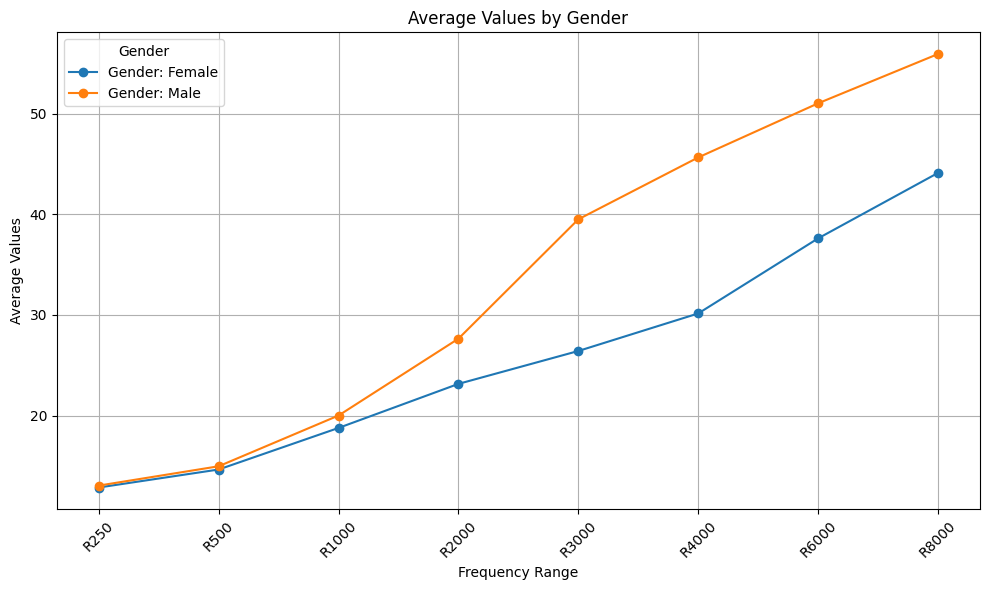

In [ ]:
# right: cleaned data related to right ear
right = clean[['GENDER','R250', 'R500', 'R1000', 'R2000', 'R3000',
       'R4000', 'R6000', 'R8000']].groupby('GENDER').mean()
right = right.T

plt.figure(figsize=(10, 6))
for gender in right.columns:
    plt.plot(right.index, right[gender], marker='o', label=f'Gender: {gender}')

plt.title('Average Values by Gender')
plt.xlabel('Frequency Range')
plt.ylabel('Average Values')
plt.legend(title='Gender')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Plot left ear hearing color coded by gender.**

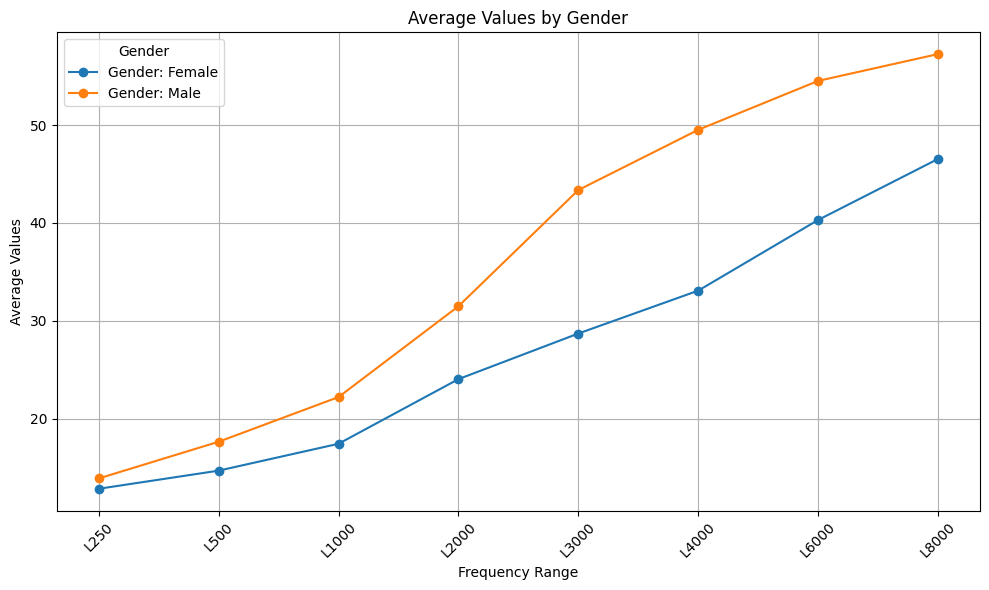

In [ ]:
# left: cleaned data related to left ear
left = clean[['GENDER','L250', 'L500', 'L1000', 'L2000', 'L3000',
       'L4000', 'L6000', 'L8000']].groupby('GENDER').mean()
left = left.T

plt.figure(figsize=(10, 6))
for gender in left.columns:
    plt.plot(left.index, left[gender], marker='o', label=f'Gender: {gender}')

plt.title('Average Values by Gender')
plt.xlabel('Frequency Range')
plt.ylabel('Average Values')
plt.legend(title='Gender')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:**

For both left and right ears, male experiences a more severe hearing loss. The difference increases as frequency range increases.

**Plot the distributions** of LPTA3, LPTA4, RPTA3, RPTA4 on top of each other, faceted by gender. These distributions should generally follow a similar shape within each gender.

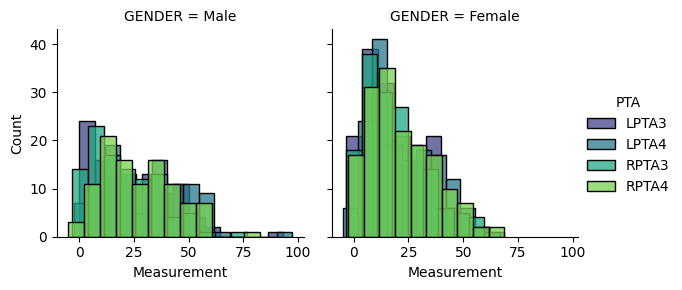

In [ ]:
# clean_pta: different structure of clean, to better plot the facet histogram
clean_pta = clean.melt(id_vars='GENDER', value_vars=['LPTA3', 'LPTA4', 'RPTA3', 'RPTA4'], var_name='PTA', value_name='Measurement')

g = sns.FacetGrid(clean_pta, col='GENDER', hue='PTA', palette='viridis', col_wrap=2)
g.map(sns.histplot, 'Measurement', binwidth = 7)

g.add_legend()
plt.show()

**Observation:**

There are likely more female samples in the dataset, but we can see that male's PTA scores have a greater range.

**Covariance heat map for all frequency measures.**

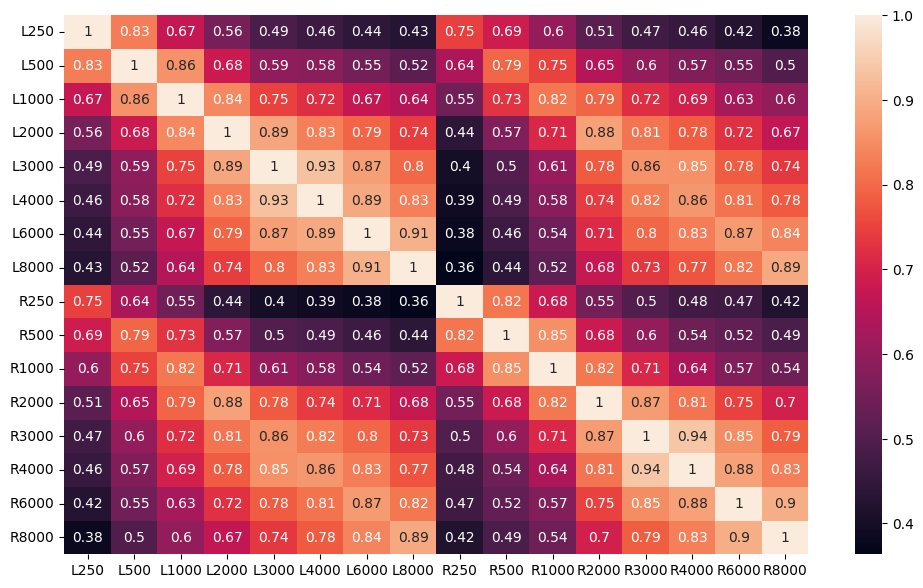

In [ ]:
cols_list = clean.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(clean[['L250', 'L500', 'L1000', 'L2000', 'L3000',
       'L4000', 'L6000', 'L8000', 'R250', 'R500', 'R1000', 'R2000', 'R3000',
       'R4000', 'R6000', 'R8000']].corr(), annot = True)
plt.show()

**Observation:**

Most of them have high correlation with each other. This means we can drop columns, or reduce the dimension. The question we now want to answer is which columns should be dropped? Or how do we best preserve the original information?

**Scatter plot** to see how all samples' RPTA4 values are distributed across the entire age range, colored by gender.

<Axes: xlabel='AGE', ylabel='RPTA4'>

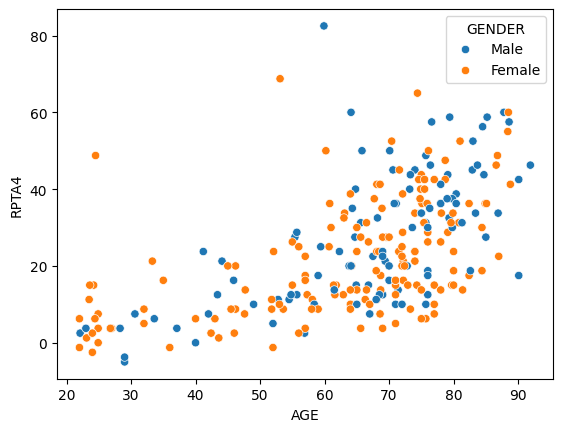

In [ ]:
sns.scatterplot(data = clean, x = 'AGE', y = 'RPTA4', hue = 'GENDER')

**Export data for later use.**

In [ ]:
clean.to_csv('/content/drive/MyDrive/UW/sphscAudiogram/audiogram_clean.csv', index=False)

In [ ]:
interest.to_csv('/content/drive/MyDrive/UW/sphscAudiogram/audiogram_interest.csv', index=False)